# Classification(Lesson 3)
## Logistic regression

### First of all import needed packages

In [1]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import scipy.optimize as opt
import pandas as pd
import pylab as pl
import numpy as np
# Use this to show matplotlib and plots properly(But not essential)
%matplotlib inline

### Read the csv(Comma seperated value) file with pandas

In [147]:
Data_Frame = pd.read_csv('Churn.csv')
Data_Frame.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,tollmon,equipmon,cardmon,wiremon,longten,tollten,cardten,voice,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,20.75,0.0,15.25,35.7,42.00,211.45,125.0,1.0,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,0.00,0.0,0.00,0.0,288.80,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,0.00,0.0,0.00,0.0,157.05,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,45.00,50.1,23.25,64.9,239.55,1873.05,880.0,1.0,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,22.00,0.0,23.75,0.0,47.45,166.10,145.0,1.0,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


### Slice some data and make churn a pure integer

In [148]:
Data_Frame = Data_Frame[['tenure','age','address','income','ed','employ','equip','callcard','wireless','churn']]
Data_Frame['churn'] = Data_Frame['churn'].astype('int')
Data_Frame.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [149]:
x = np.asarray(Data_Frame[['tenure','age','address','income','ed','employ','equip']])
x[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [150]:
y = np.asarray(Data_Frame[['churn']])
y[0:5].reshape(1,5)[0]

array([1, 1, 0, 0, 0])

### Normalize you data

In [151]:
scaler = preprocessing.StandardScaler()

In [152]:
normalized_x = scaler.fit(x).transform(x)
normalized_x[0:5]

array([[-1.14, -0.63, -0.46,  0.48,  1.7 , -0.58, -0.86],
       [-0.12, -0.63,  0.03, -0.33, -0.64, -1.14, -0.86],
       [-0.58, -0.86, -0.26, -0.35, -1.42, -0.92, -0.86],
       [ 0.12, -0.47, -0.66,  0.01, -0.64, -0.03,  1.16],
       [-1.32, -0.47,  0.23,  0.04, -0.64,  0.53, -0.86]])

### Split your data into test and train

In [153]:
from sklearn.model_selection import train_test_split
# 20 % for test and 80 % for train
x_train , x_test , y_train , y_test = train_test_split(x,y,
                                                      test_size=0.2,
                                                      random_state=5)
print(f'Train_x : {x_train.shape}\nTrain_y : {y_train.shape}')
print('\n')
print(f'Test_x : {x_test.shape}\nTest_y : {y_test.shape}')

Train_x : (160, 7)
Train_y : (160, 1)


Test_x : (40, 7)
Test_y : (40, 1)


### Create and run your model

In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
# C helps you prevent your overfit which is 1 by default and as much as you 
# decrease it makes it more stronger
Logistic_model = LogisticRegression(C=0.01,solver='liblinear').fit(x_train,y_train)
Logistic_model

C:\Users\veniz\Desktop\Parsa\ML-Practice\ML-VENV\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.01
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [155]:
# Direct prediction
predicted_y = Logistic_model.predict(x_test)
print('This is prediction : \n',predicted_y)
print('\n')
print('This is actual : \n',y_test.reshape(1,40)[0])
print('\n',predicted_y==y_test.reshape(1,40)[0])

This is prediction : 
 [0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 0 0 0]


This is actual : 
 [0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0
 0 0 0]

 [ True  True False False  True False  True  True False  True  True False
 False False False False  True  True  True False  True  True  True  True
  True  True False  True False False  True False  True  True  True  True
  True  True  True  True]


In [156]:
predicted_y_probability = Logistic_model.predict_proba(x_test)
predicted_y_probability[0:5]

array([[0.64, 0.36],
       [0.34, 0.66],
       [0.45, 0.55],
       [0.54, 0.46],
       [0.99, 0.01]])

### Evaluate the accuracy of the model

In [157]:
from sklearn.metrics import jaccard_score
# pos_label says for which item jaccard must be calculated
# because jaccard will be calculated for one item
jaccard_score(y_test,predicted_y,pos_label=0)*100

61.111111111111114

In [158]:
from sklearn.metrics import log_loss
print(log_loss(y_test,predicted_y_probability)*100)

50.948079683050516


In [159]:
from sklearn.metrics import classification_report , confusion_matrix
import itertools
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues) :
    if normalize :
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print('Normalized confusion matrix')
    else :
        print('Confusion matrix ,  without normalization')
    print(cm)
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)

    fmt = '.2f' if normalize else 'd'
    threshold = cm.max() / 2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])) :
        plt.text(j,i,format(cm[i,j],fmt),horizontalalignment='center',
                color='white' if cm[i,j] > threshold else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('predicted label')
print(confusion_matrix(y_test,predicted_y,labels=[1,0]))

[[ 4  6]
 [ 8 22]]


Confusion matrix ,  without normalization
[[ 4  6]
 [ 8 22]]


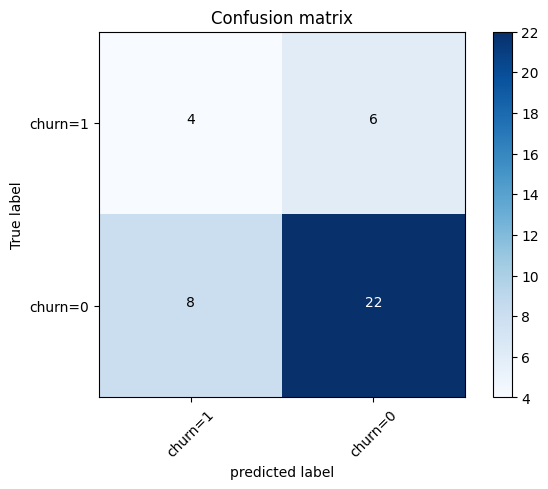

In [160]:
cnf_matrix = confusion_matrix(y_test,predicted_y,labels=[1,0])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix,classes=['churn=1','churn=0'],
                     normalize=False,
                     title='Confusion matrix',cmap=plt.cm.Blues)

In [161]:
print(classification_report(y_test,predicted_y))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76        30
           1       0.33      0.40      0.36        10

    accuracy                           0.65        40
   macro avg       0.56      0.57      0.56        40
weighted avg       0.67      0.65      0.66        40

